In [3]:
from Structe_DPP_HyperGraph import HyGraph_Matrix_DPP_Structure
from hypergraph_utils import generate_G_from_H
import torch 
from utils import *
def load_graph(dataset_name,feature_list,normalize = False):
    config['device'] = "cuda" if torch.cuda.is_available() else "cpu"
    '''1:HyperDrug & HyperProtein features
     2:sequence feature from pre-trained LLM model
    3:HyperDrug-Disease & HyperProtein-Disease features
     input:list,contains types of features ''' 
    assert len(feature_list)>0 and 1 in  feature_list
    '为了后续图架构，保证使用HyperDrug和HyperProtein特征' 
    node_num, drug_protein, protein_drug, dtidata = load_dataset_from_name(dataset_name)
    drug_protein_eye = torch.cat((drug_protein, torch.eye(node_num[0])), dim=1)
    protein_drug_eye = torch.cat((protein_drug, torch.eye(node_num[1])), dim=1)
    HyGraph_Drug = generate_G_from_H(drug_protein_eye).to(config['device'])
    HyGraph_protein = generate_G_from_H(protein_drug_eye).to(config['device'])
    HyGraph_Structure_DPP = HyGraph_Matrix_DPP_Structure(dtidata, node_num[0], node_num[1],dataset_name)
    for HyGraph in [HyGraph_Drug,HyGraph_protein,HyGraph_Structure_DPP]:
        num_nodes = HyGraph .shape[0]  # 矩阵的行数即为节点数
        upper_triangular = torch.triu(HyGraph, diagonal=1)  # 获取上三角矩阵（不包括对角线）
        num_hyperedges = torch.sum(upper_triangular > 0).item()  # 统计非零元素的数量
        print(f'------------------dataset_name:{dataset_name}------------------------------------')
        print('num_nodes,num_hyperedge',num_nodes, num_hyperedges)

     

In [5]:
for name in ["NRs","Zheng"]:
    load_graph(name,[1],normalize = False)

------------------dataset_name:NRs------------------------------------
num_nodes,num_hyperedge 54 218
------------------dataset_name:NRs------------------------------------
num_nodes,num_hyperedge 26 54
------------------dataset_name:NRs------------------------------------
num_nodes,num_hyperedge 180 1003
------------------dataset_name:Zheng------------------------------------
num_nodes,num_hyperedge 1094 91835
------------------dataset_name:Zheng------------------------------------
num_nodes,num_hyperedge 1556 74135
------------------dataset_name:Zheng------------------------------------
num_nodes,num_hyperedge 10000 145798


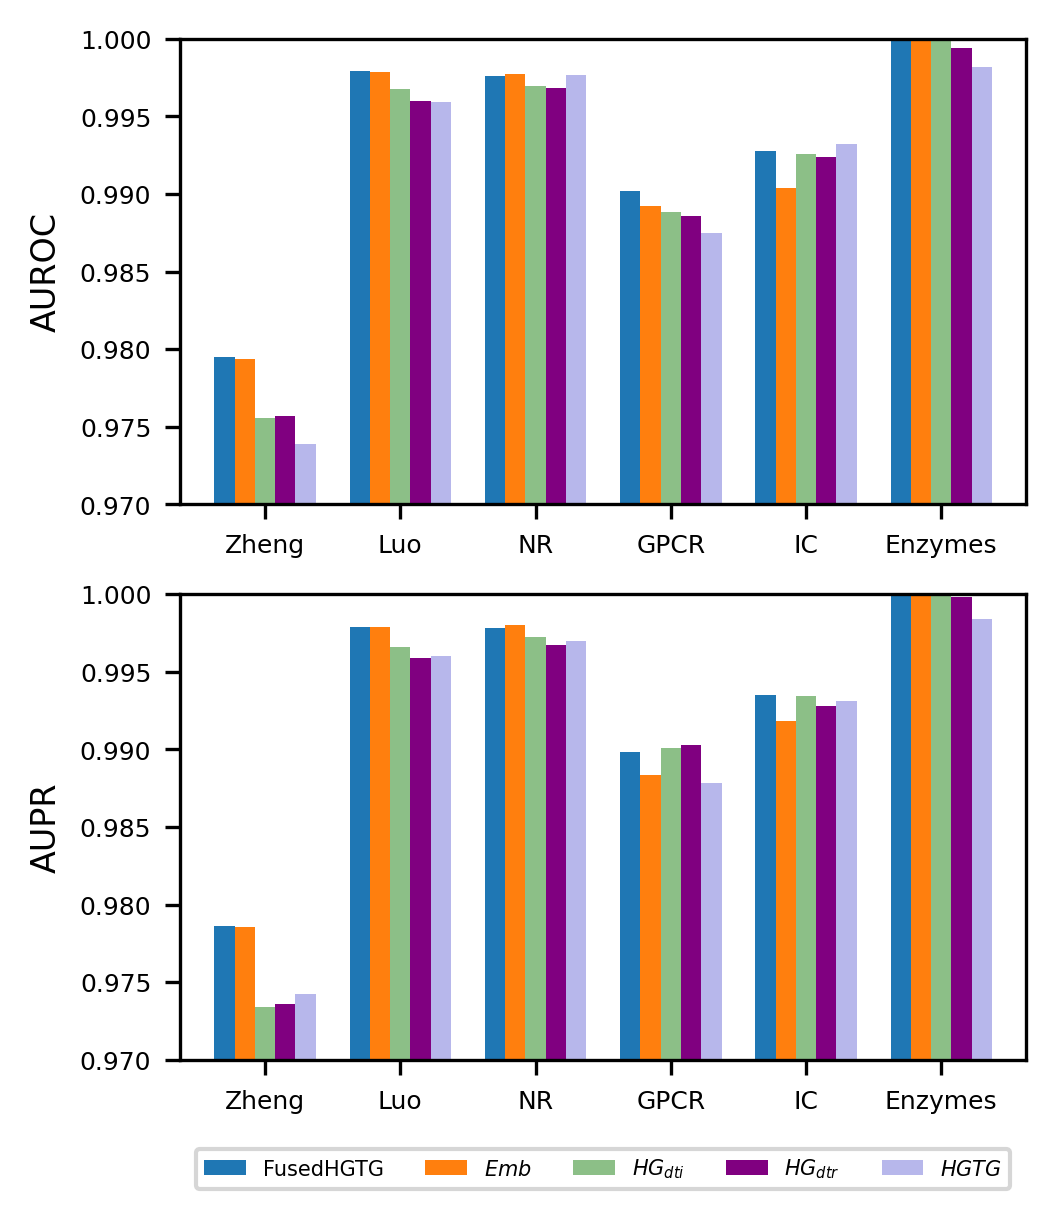

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 手动输入从图像中提取的平均AUROC和AUPR数据
auroc_data = {
    'Dataset': ['Zheng', 'Luo',   'NR','GPCR', 'IC','Enzymes'],
    'FusedHGTG':[0.9795, 0.9979, 0.9976, 0.9902, 0.9928, 1],
     r'$Emb $': [0.97934, 0.99788, 0.99776, 0.98922, 0.99036, 1.0000],
     r'$HG_{dti} $': [0.97554, 0.99674, 0.99698, 0.98886, 0.99258, 1.0000],
    r'$HG_{dtr} $': [0.9757, 0.99602, 0.9968, 0.98856, 0.9924, 0.99938],
    r'$HGTG$':[0.9739, 0.9959, 0.9977, 0.9875, 0.9932, 0.9982] 
}

aupr_data = {
    'Dataset': ['Zheng', 'Luo',   'NR','GPCR', 'IC','Enzymes'],
    'FusedHGTG':[0.9786, 0.9979, 0.9978, 0.9898, 0.9935, 1],
     r'$Emb $': [0.97852, 0.99788, 0.99798, 0.98834, 0.9918, 1.0000], 
    r'$HG_{dti} $':  [0.9734, 0.9966, 0.99724, 0.99008, 0.99346, 1.0000],
    r'$HG_{dtr} $': [0.9736, 0.9959, 0.9967, 0.9903, 0.9928, 0.9998],
    r'$HGTG $': [0.97422, 0.99598, 0.997, 0.98784, 0.99314, 0.9984],
}

df_auroc = pd.DataFrame(auroc_data)
df_aupr = pd.DataFrame(aupr_data)

# 设置全局字体大小
plt.rcParams.update({'font.size': 6})  # 设置默认字体大小

# 创建两个图表，一个用于AUROC，一个用于AUPR
#fig, axes = plt.subplots(2, 1, figsize=(3.5,4), dpi=300)
fig, axes = plt.subplots(2, 1, figsize=(3.5,4), dpi=300)
colors = ['#1f77b4', '#ff7f0e', '#8cBF87',   'purple','#B7B7EB', 'brown', 'pink', 'cyan']

# 绘制AUROC均值条形图
df_auroc.set_index('Dataset').plot(kind='bar', ax=axes[0], width=0.75,color=colors)
axes[0].set_ylabel('AUROC', fontsize=8)  # Y轴标签字体
axes[0].set_xticklabels(df_auroc['Dataset'], rotation=0)  # X轴刻度字体
axes[0].set_ylim([0.97, 1.00])
axes[0].set_xlabel('') 
axes[0].legend().remove()


# 绘制AUPR均值条形图
df_aupr.set_index('Dataset').plot(kind='bar', ax=axes[1], width=0.75, color=colors)
axes[1].set_ylabel('AUPR', fontsize=8)  # Y轴标签字体
axes[1].set_xticklabels(df_aupr['Dataset'], rotation=0)  # X轴刻度字体
axes[1].set_ylim([0.97, 1.00])
axes[1].set_xlabel('') 
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5, fontsize=5)  # 图例字体


# 图形布局调整
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/Revised_Figure4.tif', dpi=300)
plt.show()


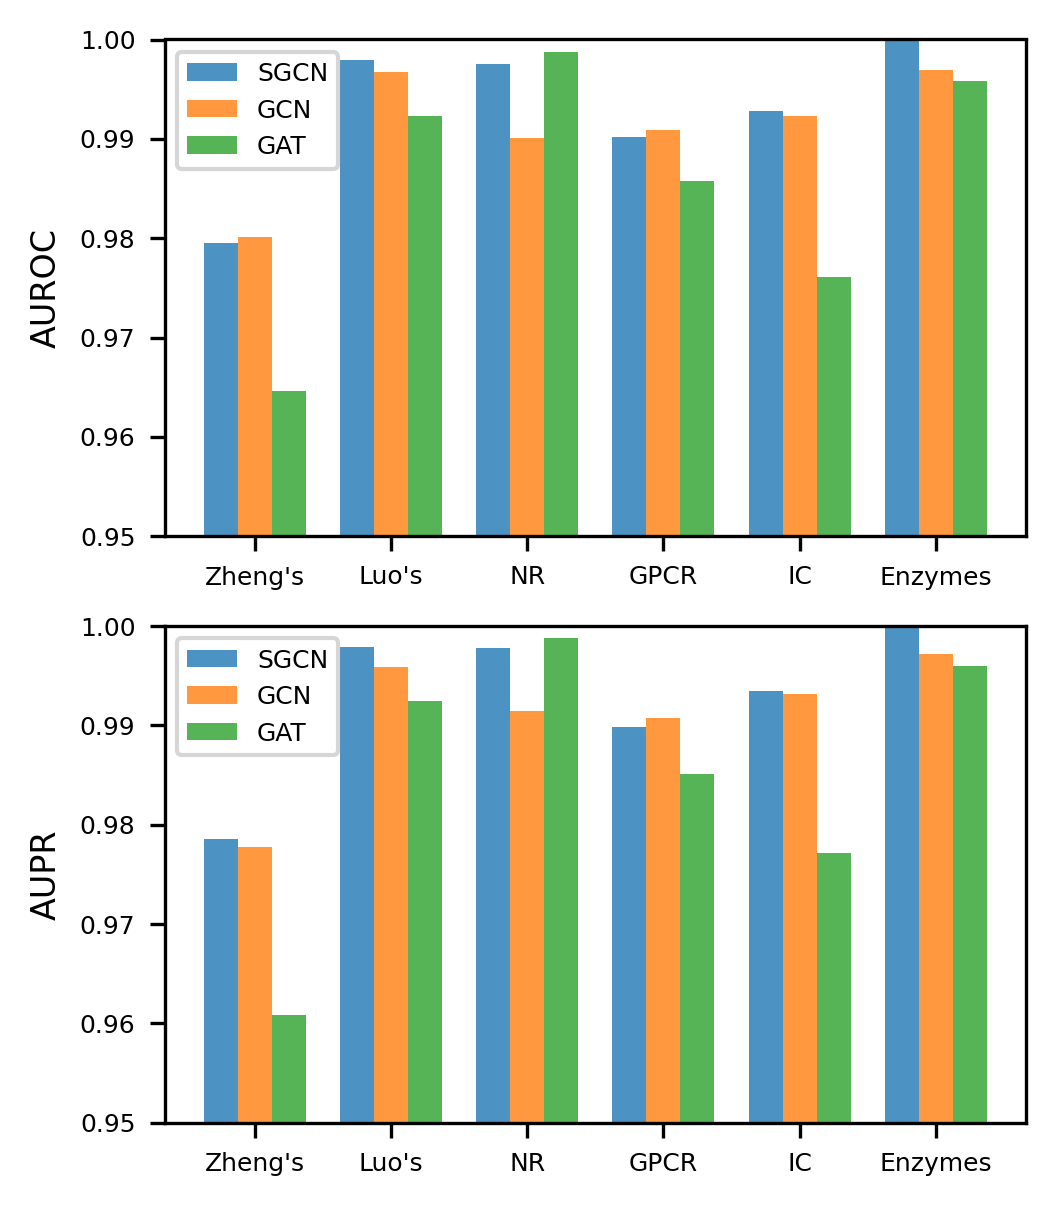

In [14]:
import numpy as np
# 设置全局字体大小
plt.rcParams.update({'font.size': 6}) 
# Updated data for SGCN, GCN, and GAT AUROC and AUPR from the latest image.
updated_data = {
    "Method": [
        "SGCN", "SGCN", "SGCN", "SGCN", "SGCN", "SGCN",
        "GCN", "GCN", "GCN", "GCN", "GCN", "GCN",
        "GAT", "GAT", "GAT", "GAT", "GAT", "GAT"
    ],
    "Dataset": [
        "Zheng's", "Luo's", "NR", "GPCR", "IC", "Enzymes",
        "Zheng's", "Luo's", "NR", "GPCR", "IC", "Enzymes",
        "Zheng's", "Luo's", "NR", "GPCR", "IC", "Enzymes"
    ],
    "AUROC": [
        0.9795, 0.9979, 0.99756, 0.99022, 0.99276, 1,
        0.98008, 0.9967, 0.99012, 0.9909, 0.99234, 0.99698,
        0.96458, 0.99228, 0.99876, 0.98572, 0.97608, 0.99582
    ],
    "AUPR": [
        0.97856, 0.99786, 0.99776, 0.98982, 0.9935, 1,
        0.9778, 0.99584, 0.99144, 0.99072, 0.99318, 0.99716,
        0.96088, 0.99244, 0.99876, 0.9851, 0.97716, 0.99596
    ]
}

# Create a DataFrame for the updated data
updated_df = pd.DataFrame(updated_data)

# Plotting AUROC and AUPR for each method and dataset in separate subplots with updated data.
fig, ax = plt.subplots(2, 1, figsize=(3.5, 4),dpi=300)

# Define a bar width for better separation
bar_width = 0.25
x = np.arange(len(updated_df["Dataset"].unique()))

# AUROC plot
for idx, method in enumerate(updated_df["Method"].unique()):
    subset = updated_df[updated_df["Method"] == method]
    ax[0].bar(x + idx * bar_width, subset["AUROC"], width=bar_width, label=method, alpha=0.8)

#ax[0].set_title('AUROC Comparison Across Methods and Datasets (Updated)')
ax[0].set_ylabel('AUROC', fontsize=8)
ax[0].set_xlabel('Dataset')
ax[0].set_xticks(x + bar_width)
ax[0].set_xticklabels(updated_df["Dataset"].unique())
ax[0].set_ylim(0.95, 1)
ax[0].legend()
ax[0].set_xlabel('') 
#ax[0].grid(True, linestyle='--', alpha=0.7)

# AUPR plot
for idx, method in enumerate(updated_df["Method"].unique()):
    subset = updated_df[updated_df["Method"] == method]
    ax[1].bar(x + idx * bar_width, subset["AUPR"], width=bar_width, label=method, alpha=0.8)

#ax[1].set_title('AUPR Comparison Across Methods and Datasets (Updated)')
ax[1].set_ylabel('AUPR', fontsize=8)
ax[1].set_xlabel('Dataset')
ax[1].set_xticks(x + bar_width)
ax[1].set_xticklabels(updated_df["Dataset"].unique())
ax[1].set_ylim(0.95, 1)
ax[1].legend()
ax[1].set_xlabel('') 
#ax[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/Revised_FigureS1.tif', dpi=300)
plt.show()



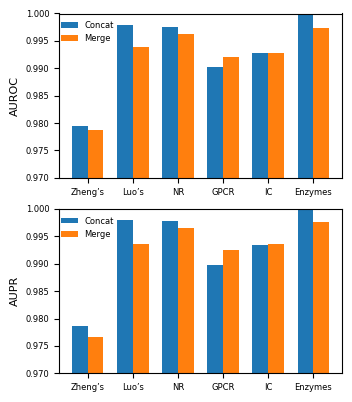

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Concat Mode and Merge Mode
categories = ['Zheng’s', 'Luo’s', 'NR', 'GPCR', 'IC', 'Enzymes']
auroc_concat = [0.9795, 0.9979, 0.9976, 0.9902, 0.9928, 1]
aupr_concat = [0.9786, 0.9979, 0.9978, 0.9898, 0.9935, 1]
auroc_merge = [0.97874, 0.9939, 0.9963, 0.99198, 0.99274, 0.99736]
aupr_merge = [0.97658, 0.99364, 0.99658, 0.99256, 0.99362, 0.99768]
x = np.arange(len(categories))  # label locations
width = 0.35  # width of the bars

# Update the color scheme to improve aesthetics
colors=['#1f77b4', '#ff7f0e', '#8cBF87', '#B7B7EB','pink']
# 设置全局字体大小
plt.rcParams.update({'font.size': 6})  # 设置默认字体大小
# Create subplots for AUROC and AUPR comparison with new color scheme
fig, ax = plt.subplots(2, 1, figsize=(3.5, 4))

# Plot for AUROC comparison
ax[0].bar(x - width/2, auroc_concat, width, label='Concat', color=colors[0])
ax[0].bar(x + width/2, auroc_merge, width, label='Merge', color=colors[1])
ax[0].set_ylabel('AUROC', fontsize=8)
ax[0].set_xticks(x)
ax[0].set_xticklabels(categories)
ax[0].legend(loc='upper left', bbox_to_anchor=(-0.02, 1),frameon=False)
ax[0].set_ylim([0.97, 1.00])
# Plot for AUPR comparison
ax[1].bar(x - width/2, aupr_concat, width, label='Concat', color=colors[0])
ax[1].bar(x + width/2, aupr_merge, width, label='Merge', color=colors[1])
ax[1].set_ylabel('AUPR', fontsize=8)
ax[1].set_xticks(x)
ax[1].set_xticklabels(categories)
ax[1].legend(loc='upper left', bbox_to_anchor=(-0.02, 1),frameon=False)
ax[1].set_ylim([0.97, 1.00])
# Adjust layout and show plot
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/Figure4.tif',dpi=300)
plt.show()


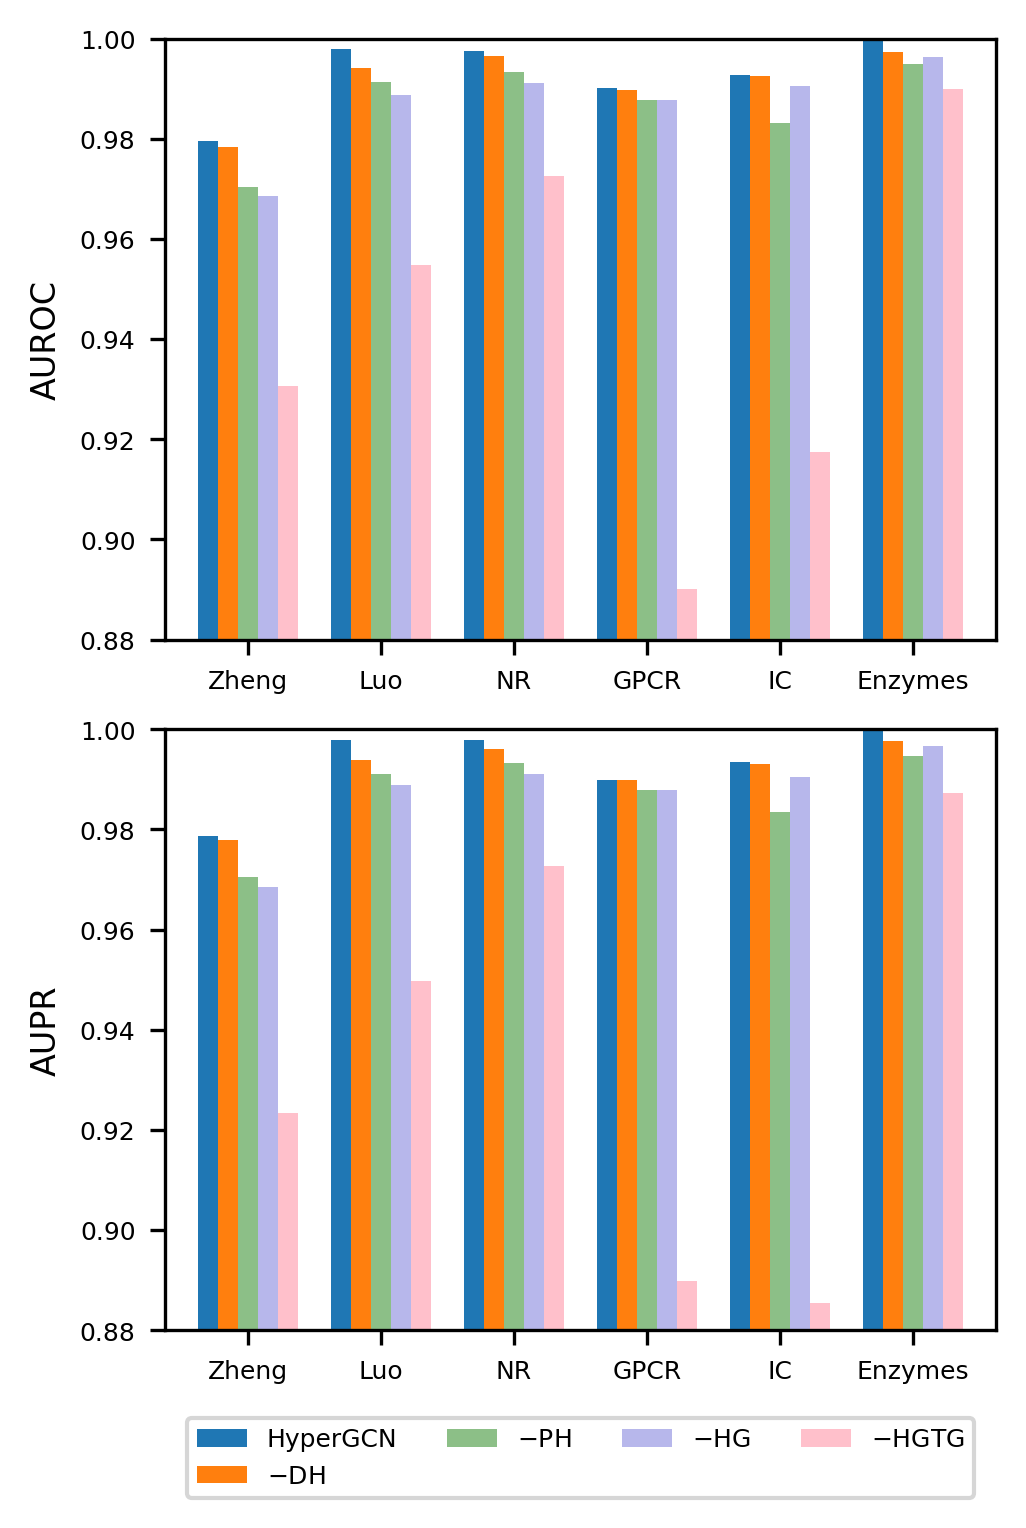

In [4]:


# Sample hypothetical data for the different module exclusion experiments
import pandas as pd
import matplotlib.pyplot as plt
colors=['#1f77b4', '#ff7f0e', '#8cBF87', '#B7B7EB','pink']
# Manually input data from the provided image for AUROC and AUPR
data = {
    'Dataset': ['Zheng', 'Luo', 'NR', 'GPCR', 'IC', 'Enzymes'],
    'HyperGCN': [0.9795, 0.9979, 0.9976, 0.9902, 0.9928, 1.0],
    r'$- $DH': [0.9783, 0.9942, 0.9966, 0.9898, 0.9926, 0.9974],
    r'$- $PH': [0.9704, 0.9913, 0.9934, 0.9877, 0.9832, 0.9949],
    r'$- $HG': [0.9685, 0.9888, 0.9912, 0.9877, 0.9905, 0.9963],
    r'$- $HGTG': [0.9306, 0.9548, 0.9726, 0.8902, 0.9175, 0.9899],
}

aupr_data = {
    'Dataset': ['Zheng', 'Luo', 'NR', 'GPCR', 'IC', 'Enzymes'],
    'HyperGCN': [0.9786, 0.9979, 0.9978, 0.9898, 0.9935, 1.0],
    r'$- $DH': [0.9778, 0.9939, 0.9961, 0.9898, 0.993, 0.9977],
    r'$- $PH': [0.9705, 0.9911, 0.9932, 0.9878, 0.9835, 0.9946],
    r'$- $HG': [0.9686, 0.9889, 0.991, 0.9878, 0.9905, 0.9966],
    r'$- $HGTG': [0.9234, 0.9497, 0.9728, 0.8898, 0.8855, 0.9873]
}

# Create DataFrame
df = pd.DataFrame(data)
aupr_df = pd.DataFrame(aupr_data)
# 设置全局字体大小
plt.rcParams.update({'font.size': 6})  # 设置默认字体大小
# Create bar charts to compare AUROC and AUPR
fig, axes = plt.subplots(2, 1, figsize=(3.4,5),dpi=300)

# Plot AUROC comparison
df.set_index('Dataset').plot(kind='bar', ax=axes[0], width=0.75,color = colors)
axes[0].set_ylabel('AUROC', fontsize=8)
#axes[0].set_title('AUROC Comparison Across Methods and Datasets')
axes[0].set_ylim([0.88, 1.0])
axes[0].set_xlabel('')  # Remove x-axis label
axes[0].set_xticklabels(df['Dataset'], rotation=0)
axes[0].legend().remove()
#axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=5, fontsize='medium')
# Plot AUPR comparison
aupr_df.set_index('Dataset').plot(kind='bar', ax=axes[1], width=0.75,color = colors)
axes[1].set_ylabel('AUPR', fontsize=8)
#axes[1].set_title('AUPR Comparison Across Methods and Datasets')
axes[1].set_ylim([0.88, 1.0])
axes[1].set_xlabel('')  # Remove x-axis label
axes[1].set_xticklabels(aupr_df['Dataset'], rotation=0)
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize='medium')
# Show the plots
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/revised_Figure3.tif',dpi=300)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


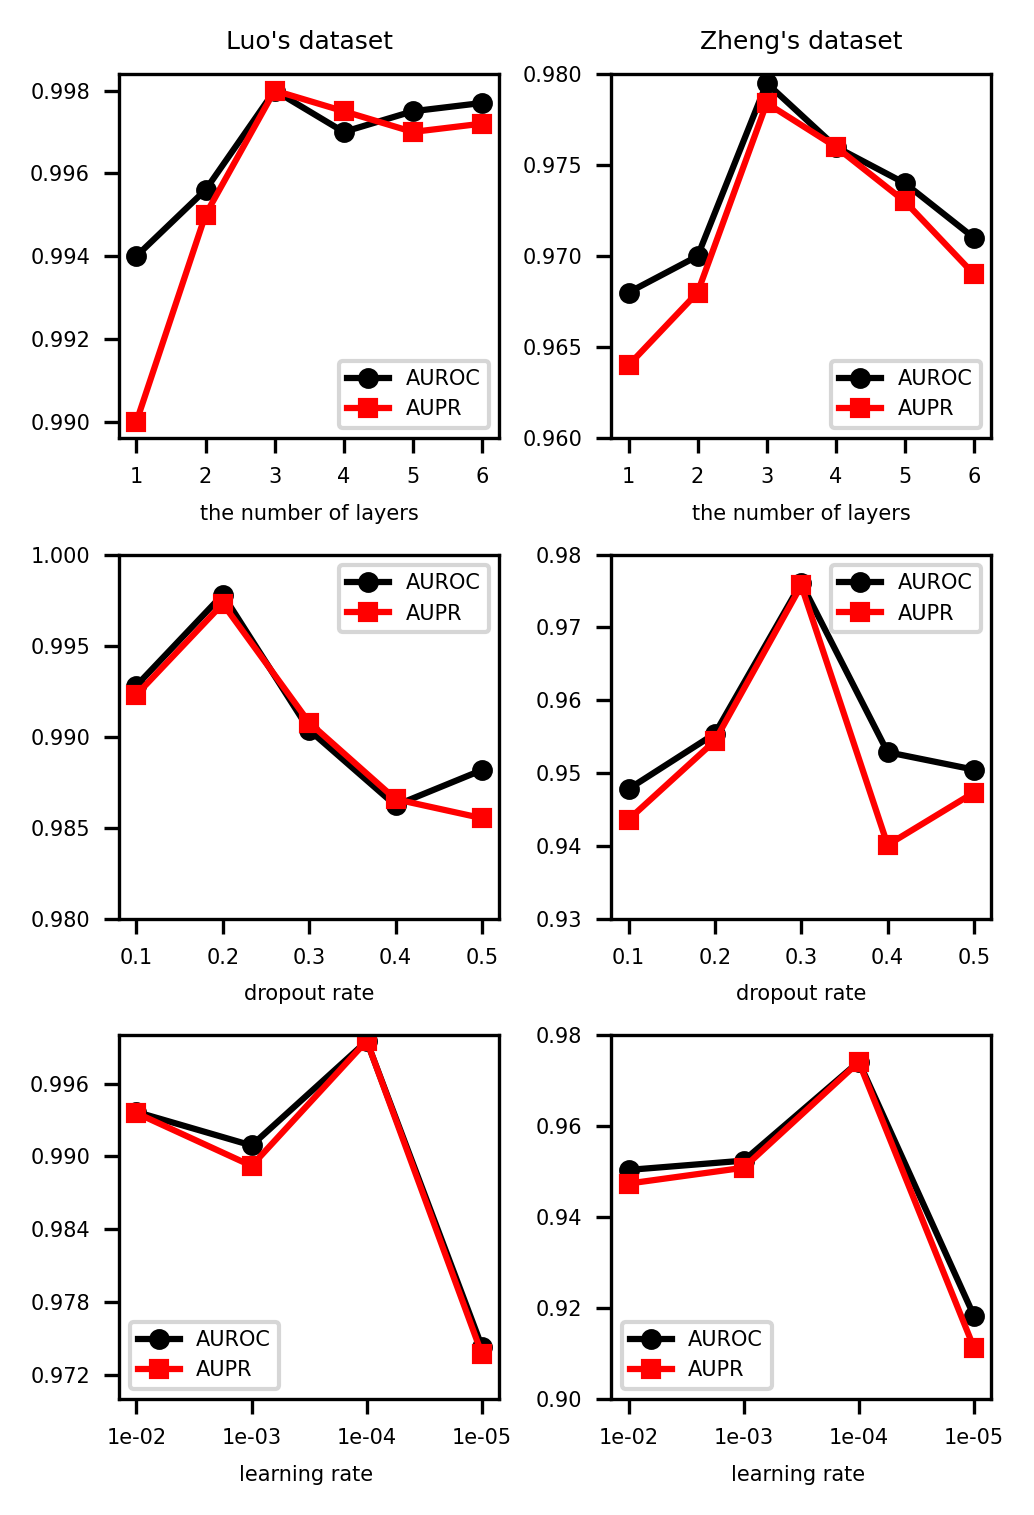

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator 
# 数据
layers = np.array([1, 2, 3, 4, 5, 6])
dropout = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
learning_rate = np.array([1,2,3,4])

# Luo's dataset 数据
layers_auroc_luo = np.array([0.994, 0.9956, 0.998, 0.997, 0.9975, 0.9977])
layers_aupr_luo = np.array([0.990, 0.995, 0.998, 0.9975, 0.997, 0.9972])
dropout_auroc_luo = np.array([0.9928,0.9978, 0.99036, 0.98622, 0.98816])
dropout_aupr_luo = np.array([0.9923, 0.9973, 0.99077, 0.98656, 0.98552])
lr_auroc_luo = np.array([0.99366,0.9909, 0.9995, 0.97432])
lr_aupr_luo = np.array([0.99357, 0.98922, 0.99952, 0.97372])
# Zheng's dataset 数据
layers_auroc_zheng = np.array([0.968, 0.970, 0.9795, 0.976, 0.974, 0.971])
layers_aupr_zheng = np.array([0.964, 0.968, 0.9784, 0.976, 0.973, 0.969])
dropout_auroc_zheng = np.array([0.9478,0.9554, 0.9761, 0.95286, 0.95046])
dropout_aupr_zheng = np.array([0.9436, 0.954413, 0.97575, 0.94012, 0.94732])
lr_auroc_zheng = np.array([0.95036,0.9524, 0.974146, 0.9183])
lr_aupr_zheng= np.array([0.94736, 0.95084, 0.97408, 0.91126])
# 设置全局字体大小
plt.rcParams.update({'font.size': 5})  # 设置默认字体大小
plt.rcParams['lines.markersize'] = 4
# 创建图形
fig, axes = plt.subplots(3, 2, figsize=(3.4,5),dpi=300)

# Luo's dataset 图
axes[0][0].plot(layers, layers_auroc_luo, label='AUROC', marker='o', color='black')
axes[0][0].plot(layers, layers_aupr_luo, label='AUPR', marker='s', color='red')
axes[0][0].set_title("Luo's dataset")
axes[0][0].set_xlabel('the number of layers')
#axes[0].set_ylabel('Score')
# 更改横坐标标签
axes[0][0].set_xticks([1, 2, 3, 4, 5, 6])  # 设置刻度
#axes[0][0].set_xticklabels(['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])  # 设置对应标签
axes[0][0].legend()

axes[1][0].plot(dropout, dropout_auroc_luo, label='AUROC', marker='o', color='black')
axes[1][0].plot(dropout, dropout_aupr_luo, label='AUPR', marker='s', color='red')
axes[1][0].set_xlabel('dropout rate')
axes[1][0].set_ylim(0.98, 1)
axes[1][0].yaxis.set_major_locator(MaxNLocator(nbins=5)) 
#axes[0].set_ylabel('Score')
axes[1][0].legend()
axes[2][0].plot(learning_rate , lr_auroc_luo, label='AUROC', marker='o', color='black')
axes[2][0].plot(learning_rate , lr_aupr_luo, label='AUPR', marker='s', color='red')
axes[2][0].set_xlabel('learning rate ')
axes[2][0].set_ylim(0.97, 1)
axes[2][0].yaxis.set_major_locator(MaxNLocator(nbins=6)) 
axes[2][0].set_xticks ([1,2,3,4])
axes[2][0].set_xticklabels (['1e-02', '1e-03','1e-04','1e-05'])
#axes[0].set_ylabel('Score')
axes[2][0].legend()

# Zheng's dataset 图
axes[0][1].plot(layers, layers_auroc_zheng, label='AUROC', marker='o', color='black')
axes[0][1].plot(layers, layers_aupr_zheng, label='AUPR', marker='s', color='red')
axes[0][1].set_title("Zheng's dataset")
axes[0][1].set_xlabel('the number of layers')
axes[0][1].set_xticks([1, 2, 3, 4, 5, 6])  # 设置刻度
axes[0][1].set_ylim(0.96, 0.98)
axes[0][1].yaxis.set_major_locator(MaxNLocator(nbins=5)) 
#axes[1].set_ylabel('Score')
axes[0][1].legend()

axes[1][1].plot(dropout, dropout_auroc_zheng, label='AUROC', marker='o', color='black')
axes[1][1].plot(dropout, dropout_aupr_zheng, label='AUPR', marker='s', color='red')
axes[1][1].set_xlabel('dropout rate')
axes[1][1].set_ylim(0.93, 0.98)
axes[1][1].yaxis.set_major_locator(MaxNLocator(nbins=5)) 
axes[1][1].legend()
#axes[0].set_ylabel('Score')
axes[2][1].legend()
axes[2][1].plot(learning_rate , lr_auroc_zheng, label='AUROC', marker='o', color='black')
axes[2][1].plot(learning_rate , lr_aupr_zheng, label='AUPR', marker='s', color='red')
axes[2][1].set_xlabel('learning rate ')
axes[2][1].set_xticks ([1,2,3,4])
axes[2][1].set_xticklabels (['1e-02', '1e-03','1e-04','1e-05'])
axes[2][1].set_ylim(0.9, 0.98)
axes[2][1].yaxis.set_major_locator(MaxNLocator(nbins=5)) 
#axes[0].set_ylabel('Score')
axes[2][1].legend(loc='lower left')

# 显示图形
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/revised_Figure8.tif',dpi=300)
plt.show()


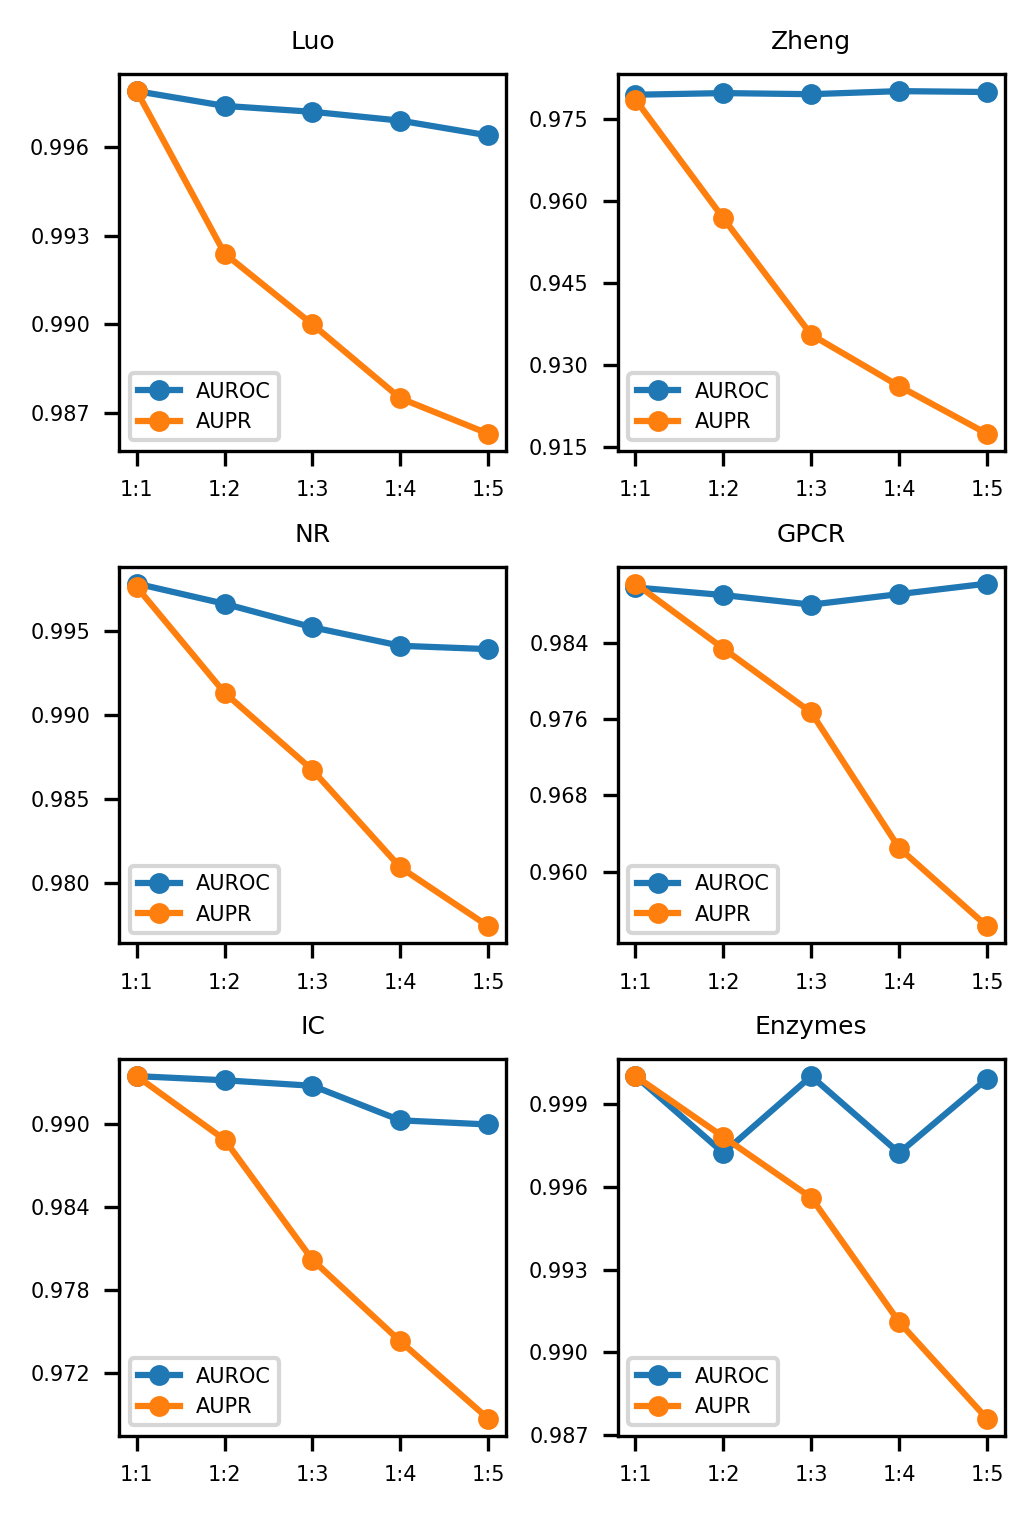

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data for AUROC and AUPr values
datasets = ['Luo',  'Zheng','NR', 'GPCR', 'IC', 'Enzymes',]
ratios = ['1:1', '1:2', '1:3', '1:4', '1:5']

auroc_values = {
    'Luo': [0.9979, 0.9974, 0.9972, 0.9969, 0.9964],
    'NR': [0.9978, 0.9966, 0.9952, 0.9941, 0.9939],
    'GPCR': [0.9898, 0.989, 0.988, 0.9891, 0.9902],
    'IC': [0.9935, 0.9932, 0.9928, 0.9903, 0.99],
    'Enzymes': [1, 0.99722, 1, 0.99722, 0.9999],
    'Zheng': [0.9795, 0.9798, 0.9796, 0.98016, 0.98]
}

aupr_values = {
    'Luo': [0.9979, 0.9924, 0.99, 0.9875, 0.9863],
    'NR': [0.9976, 0.9913, 0.9867, 0.9809, 0.9774],
    'GPCR': [0.9902, 0.9834, 0.9767, 0.9625, 0.9543],
    'IC': [0.9935, 0.9889, 0.9802, 0.9743, 0.9687],
    'Enzymes': [1, 0.9978, 0.9956, 0.9911, 0.9876],
    'Zheng': [0.9786, 0.9569, 0.9356, 0.9262, 0.9175]
}

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(3.4, 5),dpi=300)
# 设置全局字体大小
plt.rcParams.update({'font.size': 5})  # 设置默认字体大小
plt.rcParams['lines.markersize'] = 4
axes = axes.ravel()  # Flatten the 2D array of axes for easier indexing

for i, dataset in enumerate(datasets):
    # Plot AUROC
    axes[i].plot(ratios, auroc_values[dataset], label="AUROC", marker='o')
    # Plot AUPr
    axes[i].plot(ratios, aupr_values[dataset], label="AUPR", marker='o')

    axes[i].set_title(dataset)
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=5)) 
    #axes[i].set_xlabel('Ratio')
    #axes[i].set_ylabel('Score')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/revised_Figure6.tif',dpi=300)
plt.show()


In [ ]:
#training
dpi = 300
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5),dpi=300)
label=['1:1', '1:2', '1:3', '1:4', '1:5']

# 5-fold CV
cv_auc_SGCN=[0.9967,0.9932,0.9932,0.992,0.9917]
cv_aupr_SGCN = [0.9975,0.9928,0.9859,0.983,0.98]

#BindingDB
B_auc_SGCN=[0.9979,0.9955,0.9889,0.9842,0.9821]
B_aupr_SGCN = [0.9979,0.9950,0.9875,0.9836,0.98]


#PubChem
p_auc_SGCN= [0.9875,0.9820,0.98,0.978,0.97]
p_aupr_SGCN = [0.8709,0.8024,0.7846,0.7643,0.75]

markers = ['^', 's']
axs[0].plot(label,cv_auc_SGCN,marker=markers[0],label='AUC')
axs[0].plot(label,cv_aupr_SGCN,marker=markers[1],label='AUPR')
axs[0].set_title('ChEMBL')
axs[1].plot(label,B_auc_SGCN,marker=markers[0],label='AUC')
axs[1].plot(label,B_aupr_SGCN,marker=markers[1],label='AUPR')
axs[1].set_title('BindingDB')
axs[2].plot(label,p_auc_SGCN,marker=markers[0],label='AUC')
axs[2].plot(label,p_aupr_SGCN,marker=markers[1],label='AUPR')
axs[2].set_title('PubChem')

#axs[1][2].set_title('PubChem')
#plt.subplots_adjust(top=0.9)

axs[0].set_ylim(0.95, 1.0)

axs[1].set_ylim(0.95, 1.0)
axs[2].set_ylim(0.7, 1)

axs[0].legend(loc = 'lower right')
axs[1].legend(loc = 'lower right')
axs[2].legend(loc = 'lower right')
#axs[0].set_xlabel('Positive-to-negative sample ratio')
#axs[0][1].legend(loc='right')
#axs[0][2].legend(bbox_to_anchor=(1.3, 0.3))
#axs[1][0].legend(loc='right')
#axs[1][1].legend(loc='right')
#axs[1][2].legend(bbox_to_anchor=(1, 0.3))
# 显示图形
#plt.grid(True)
plt.savefig('imbalanced_dataset.png', dpi=dpi)
plt.show()